In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("../../../warm-up meas/data/2021-12-23 20-36-51-sep-chgd.csv", sep=';')
df[0:9]

,SECONDS,PID,VALUE,UNITS
0,74224.614249,Скорость автомобиля,0.00000,km/h
1,74225.738249,Fuel economizer (based on fuel system status a...,-1.00000,NaN
2,74225.738249,Положение дроссельной заслонки,7.45098,%
3,74226.021249,Power from MAF,0.00000,hp
4,74226.021249,Массовый расход воздуха,0.00000,g/sec
5,74226.021249,Мгновенный расход топлива (л/ч),0.00000,L/h
6,74226.021249,Моментальная мощность двигателя (от расхода то...,0.00000,hp
7,74226.399249,Пройденный путь,0.00000,km
8,74226.399249,Пройденный путь (общий),0.00000,km


In [48]:
df_ic = df[df.loc[:,'PID']==('Мгновенный расход топлива (л/ч)')].reset_index(drop=True) # instant consumption
df_ic

,SECONDS,PID,VALUE,UNITS
0,74226.021249,Мгновенный расход топлива (л/ч),0.000000,L/h
1,74227.264249,Мгновенный расход топлива (л/ч),0.000000,L/h
2,74227.460249,Мгновенный расход топлива (л/ч),0.000000,L/h
3,74227.613249,Мгновенный расход топлива (л/ч),0.000000,L/h
4,74227.769249,Мгновенный расход топлива (л/ч),0.000000,L/h
...,...,...,...,...
3193,75181.796249,Мгновенный расход топлива (л/ч),1.023204,L/h
3194,75182.022249,Мгновенный расход топлива (л/ч),0.982947,L/h
3195,75182.219249,Мгновенный расход топлива (л/ч),0.982947,L/h
3196,75182.430249,Мгновенный расход топлива (л/ч),0.982947,L/h


In [49]:
df_ic['SECONDS']

0       74226.021249
1       74227.264249
2       74227.460249
3       74227.613249
4       74227.769249
            ...     
3193    75181.796249
3194    75182.022249
3195    75182.219249
3196    75182.430249
3197    75182.638249
Name: SECONDS, Length: 3198, dtype: float64

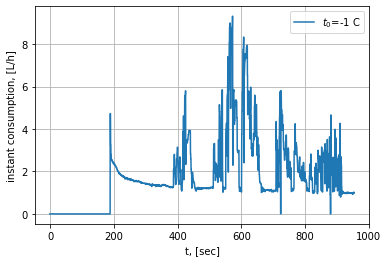

In [50]:
plt.plot(df_ic['SECONDS']-df_ic.loc[5,'SECONDS'],df_ic['VALUE'], label=r'$t_0$=-1 C')

plt.xlabel('t, [sec]')
plt.ylabel('instant consumption, [L/h]')

plt.legend()
plt.grid()
plt.show()

In [64]:
df_ic[df_ic['SECONDS']>=380+df_ic.loc[0, 'SECONDS']]

,SECONDS,PID,VALUE,UNITS
1634,74606.206249,Мгновенный расход топлива (л/ч),1.244618,L/h
1635,74606.442249,Мгновенный расход топлива (л/ч),1.244618,L/h
1636,74606.654249,Мгновенный расход топлива (л/ч),1.244618,L/h
1637,74606.860249,Мгновенный расход топлива (л/ч),1.274811,L/h
1638,74607.103249,Мгновенный расход топлива (л/ч),1.274811,L/h
...,...,...,...,...
3193,75181.796249,Мгновенный расход топлива (л/ч),1.023204,L/h
3194,75182.022249,Мгновенный расход топлива (л/ч),0.982947,L/h
3195,75182.219249,Мгновенный расход топлива (л/ч),0.982947,L/h
3196,75182.430249,Мгновенный расход топлива (л/ч),0.982947,L/h


In [68]:
df_ic[0:1634]

,SECONDS,PID,VALUE,UNITS
0,74226.021249,Мгновенный расход топлива (л/ч),0.000000,L/h
1,74227.264249,Мгновенный расход топлива (л/ч),0.000000,L/h
2,74227.460249,Мгновенный расход топлива (л/ч),0.000000,L/h
3,74227.613249,Мгновенный расход топлива (л/ч),0.000000,L/h
4,74227.769249,Мгновенный расход топлива (л/ч),0.000000,L/h
...,...,...,...,...
1629,74605.134249,Мгновенный расход топлива (л/ч),1.237909,L/h
1630,74605.365249,Мгновенный расход топлива (л/ч),1.237909,L/h
1631,74605.596249,Мгновенный расход топлива (л/ч),1.237909,L/h
1632,74605.795249,Мгновенный расход топлива (л/ч),1.237909,L/h


In [71]:
l_total = 0
for i in range(len(df_ic['VALUE']) - 1): # расход за всю поездку
    dt       = df_ic.loc[i+1, 'SECONDS'] - df_ic.loc[i, 'SECONDS']
    l_mean   = (df_ic.loc[i, 'VALUE'] + df_ic.loc[i+1, 'VALUE']) / 2
    l_total += l_mean * dt / 3600
    
l_total

0.48063942596217374

In [73]:
l_total = 0
for i in range(1634): # расход за время прогрева
    dt       = df_ic.loc[i+1, 'SECONDS'] - df_ic.loc[i, 'SECONDS']
    l_mean   = (df_ic.loc[i, 'VALUE'] + df_ic.loc[i+1, 'VALUE']) / 2
    l_total += l_mean * dt / 3600
    
l_total

0.08577219271269841